# Step 1

Summarise your dataset clearly, using relevant descriptive statistics and appropriate plots. These should be carefully motivated and justified, and clearly presented. You should critically analyse your findings, in addition to including the necessary Python code, output and plots in the report. You are required to plot at least three graphs.

### Importing Packages and Declaring functions

In [3]:
#import library packages
import numpy as np
import seaborn as sns #visualisation 
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

In [4]:
#funtions for helping

#get new dataframe without rows which has a value in a specific column
def get_df_without_values_in_col(df, col, value):
    df_return = df[~(df[col] == value)]    
    return df_return


### Loading Data

In [5]:
#Load the Population
df_population = pd.read_csv("population.csv")

In [6]:
df_population.head()

,Statistic Label,Census Year,Administrative Counties 2019,Age,Sex,UNIT,VALUE
0,Population,2022,Carlow County Council,Age 0-4,Males,Number,1800
1,Population,2022,Carlow County Council,Age 0-4,Females,Number,1736
2,Population,2022,Carlow County Council,Age 0-4,Both Sexes,Number,3536
3,Population,2022,Carlow County Council,Age 5-9,Males,Number,2063
4,Population,2022,Carlow County Council,Age 5-9,Females,Number,2026


### Cleaning Data

In [7]:
# Total number of rows and columns Before Cleaning
df_population.shape
first_size = df_population.shape
first_size

(1824, 7)

In [8]:
# Checking the data type 
df_population.dtypes

Statistic Label                 object
Census Year                      int64
Administrative Counties 2019    object
Age                             object
Sex                             object
UNIT                            object
VALUE                            int64
dtype: object

#### Cleaning Columns

In [9]:
# Dropping irrelevant columns
df_population = df_population.drop(["Statistic Label",'Census Year','UNIT'], axis=1)

In [10]:
# Renaming the column names
df_population =df_population.rename(columns={"Administrative Counties 2019": "Council","VALUE" : "Value"})
df_population.head(5) 

,Council,Age,Sex,Value
0,Carlow County Council,Age 0-4,Males,1800
1,Carlow County Council,Age 0-4,Females,1736
2,Carlow County Council,Age 0-4,Both Sexes,3536
3,Carlow County Council,Age 5-9,Males,2063
4,Carlow County Council,Age 5-9,Females,2026


#### Cleaning Rows


In [11]:
# Rows containing nulls
null_mask = df_population.isnull().any(axis=1)
null_rows = df_population[null_mask]
print(null_rows)

Empty DataFrame
Columns: [Council, Age, Sex, Value]
Index: []


The data do not have nulls

In [12]:
# Rows containing duplicate data
duplicate_rows_df = df_population[df_population.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 4)


The data do not have duplicates

##### Clean Rows not necessaries 

In [13]:
# Uniques Values from Age
df_population["Age"].unique()

array(['Age 0-4', 'Age 5-9', 'Age 10-14', 'Age 15-19', 'Age 20-24',
       'Age 25-29', 'Age 30-34', 'Age 35-39', 'Age 40-44', 'Age 45-49',
       'Age 50-54', 'Age 55-59', 'Age 60-64', 'Age 65-69', 'Age 70-74',
       'Age 75-79', 'Age 80-84', 'Age 85 and over', 'Total'], dtype=object)

The rows contain summarized rows by Age which is called "Total", now we need to delete these rows because we can get them by groupings

In [14]:
# Deleting Rows with Values "Total" in Age
df_population = df_population.loc[df_population["Age"] != "Total"]

In [15]:
# Uniques Values from Sex
df_population["Sex"].unique()

array(['Males', 'Females', 'Both Sexes'], dtype=object)

The rows contain a summarized rows by sex which is called "Both Sexes", now we need to delete these rows because we can get them by groupings

In [16]:
# Deleting Rows with Values "Both Sexes" in Sex
df_population = df_population.loc[df_population["Sex"] != "Both Sexes"]

In [17]:
# Uniques Values from Council
df_population["Council"].unique()

array(['Carlow County Council', 'Dublin City Council',
       'Dún Laoghaire Rathdown County Council', 'Fingal County Council',
       'South Dublin County Council', 'Kildare County Council',
       'Kilkenny County Council', 'Laois County Council',
       'Longford County Council', 'Louth County Council',
       'Meath County Council', 'Offaly County Council',
       'Westmeath County Council', 'Wexford County Council',
       'Wicklow County Council', 'Clare County Council',
       'Cork City Council', 'Cork County Council', 'Kerry County Council',
       'Limerick City & County Council', 'Tipperary County Council',
       'Waterford City & County Council', 'Galway City Council',
       'Galway County Council', 'Leitrim County Council',
       'Mayo  County Council', 'Roscommon County Council',
       'Sligo County Council', 'Cavan County Council',
       'Donegal County Council', 'Monaghan County Council', 'Ireland'],
      dtype=object)

The rows contain anothers summarized rows by Counties which is called "Ireland", now we need to delete these rows because we can get them by groupings

In [18]:
df_population = df_population.loc[df_population["Council"] != "Ireland"]

##### Clean Repeated Texts  from rows

In [19]:
# Remove the text inncesary from the name column
df_population['Council'] = df_population['Council'].str.replace(' Council', '')

In [20]:
df_population.head(3)

,Council,Age,Sex,Value
0,Carlow County,Age 0-4,Males,1800
1,Carlow County,Age 0-4,Females,1736
3,Carlow County,Age 5-9,Males,2063


In [21]:
# Total number of rows and columns before Cleaning Data
first_size

(1824, 7)

In [22]:
# Total number of rows and columns after Cleaning Data
df_population.shape

(1116, 4)

### Plot data

#### Population by Council

In [23]:
# Group by Council
df_population_by_councils = df_population.groupby('Council').sum("Value")
# Sort by population
df_population_by_councils.reset_index().sort_values('Value')

,Council,Value
15,Leitrim County,35199
17,Longford County,46751
0,Carlow County,61968
21,Monaghan County,65288
24,Sligo County,70198
23,Roscommon County,70259
1,Cavan County,81704
22,Offaly County,83150
9,Galway City,84414
14,Laois County,91877


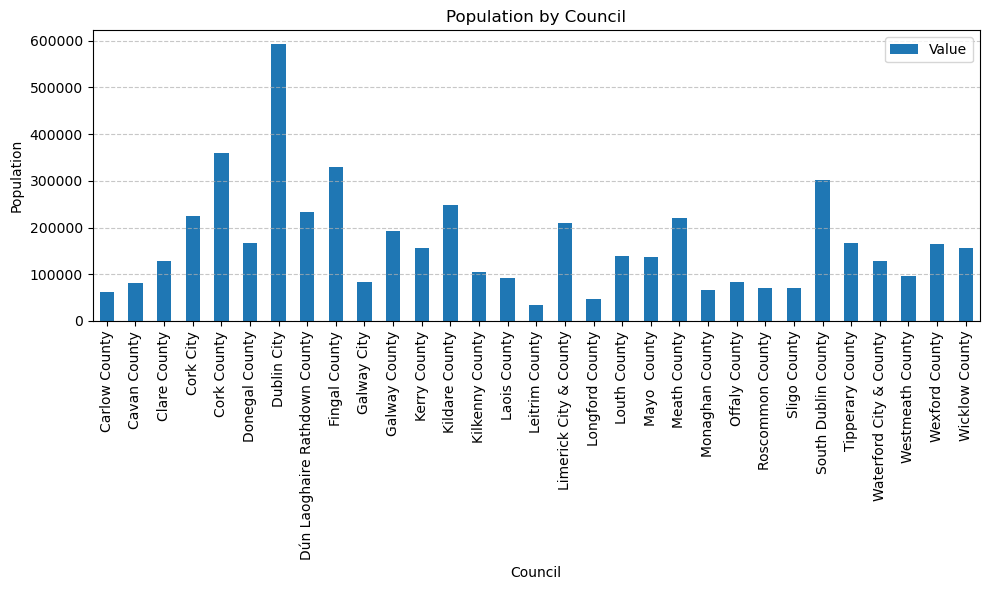

In [24]:
# Plotting the bar plot
df_population_by_councils.plot(kind='bar', figsize=(10, 6))
plt.title('Population by Council')
plt.xlabel('Council')
plt.ylabel('Population')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

#### Population by Sex

In [27]:
df_sex = df_population.groupby(["Council","Sex"]).sum("Value").reset_index()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


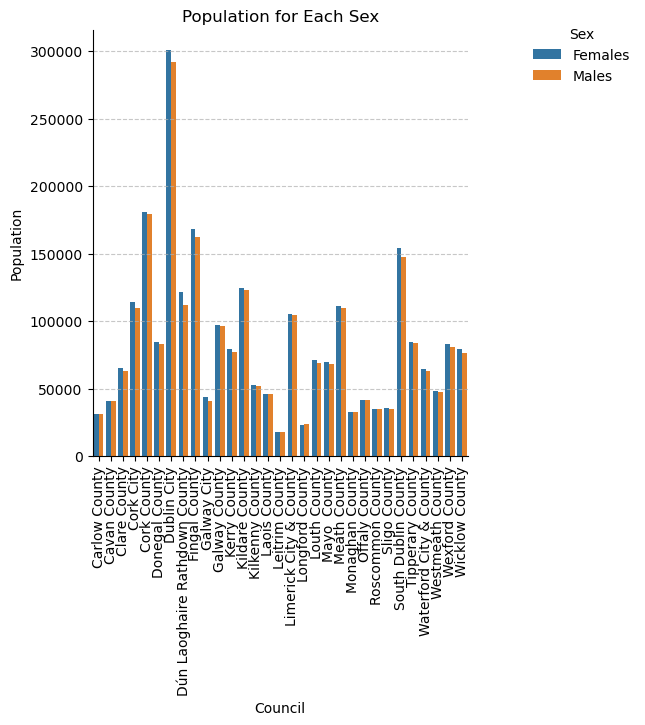

In [28]:
g = sns.catplot(
    x="Council",       # x variable name
    y="Value",       # y variable name
    hue="Sex",  # group variable name
    data=df_sex,     # dataframe to plot
    kind="bar",
)
plt.title('Population for Each Sex')
plt.xlabel('Council')
plt.ylabel('Population')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.tight_layout()
sns.move_legend(g, "upper center", bbox_to_anchor=(1, 1), title='Sex')
plt.show()

#### Scatterplot of Population

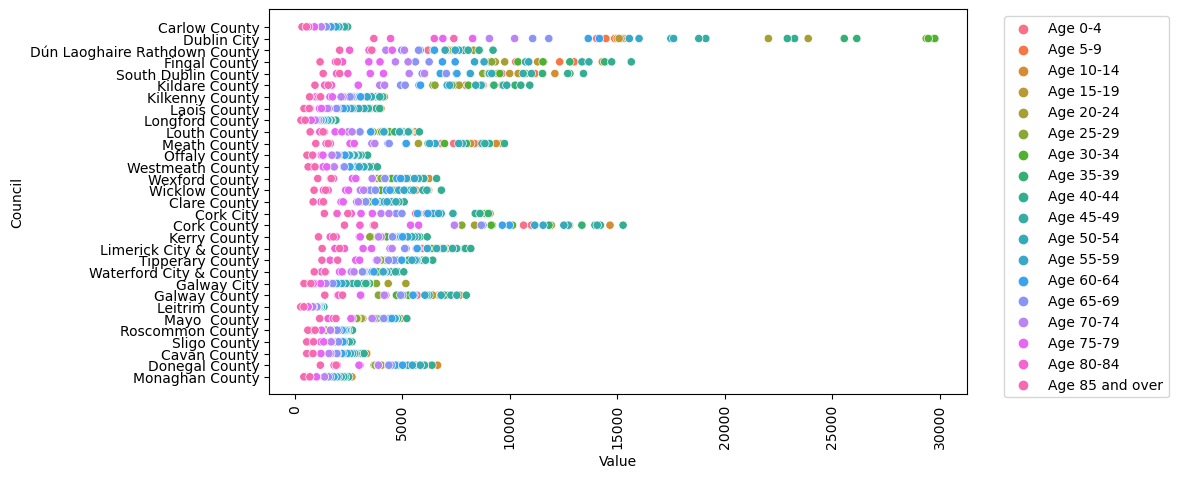

In [29]:
plt.figure(figsize=(9,5))
sns.scatterplot(data = df_population, x= "Value", y ="Council", hue="Age")
plt.xticks(rotation=90)
plt.legend(loc="upper right", bbox_to_anchor=(1.3,1))

Now we need to know information about our data

In [30]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1116 entries, 0 to 1762
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Council  1116 non-null   object
 1   Age      1116 non-null   object
 2   Sex      1116 non-null   object
 3   Value    1116 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 43.6+ KB


In [31]:
df_population["Value"].max()

29767

In [32]:
df_population["Value"].min()

282

<Axes: xlabel='Value'>

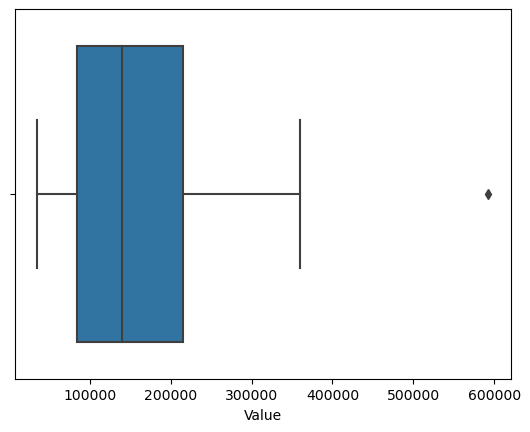

In [33]:
sns.boxplot(x=df_population_by_councils['Value']) 

In [34]:
Q1 = df_population_by_councils['Value'].quantile(0.25)
Q3 = df_population_by_councils['Value'].quantile(0.75) 

print(Q3) 
print(Q1) 
IQR = Q3 - Q1
print(IQR) 



215181.0
83782.0
131399.0


In [35]:
df_atypical = df_population_by_councils[((df_population_by_councils['Value'] < (Q1 - 1.5 * IQR)) |(df_population_by_councils['Value'] > (Q3 + 1.5 * IQR)))]
df_atypical

,Value
Council,
Dublin City,592713


In [36]:
df_without_atypical = df_population_by_councils[~((df_population_by_councils['Value'] < (Q1 - 1.5 * IQR)) |(df_population_by_councils['Value'] > (Q3 + 1.5 * IQR)))]
df_without_atypical.shape

(30, 1)

<Axes: xlabel='Value'>

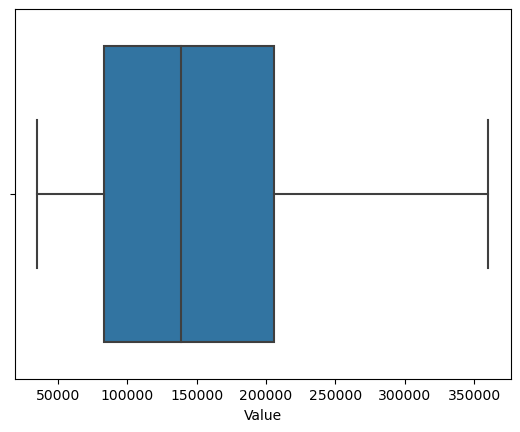

In [37]:
sns.boxplot(x=df_without_atypical['Value']) 

In [38]:
df_population.shape

(1116, 4)